실습 3: VAE 관련 분포 시뮬레이션

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.special import kl_div
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = ['DejaVu Sans']
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# 시드 설정
np.random.seed(42)

3.1 VAE의 사전분포 vs 사후분포 시뮬레이션


=== Initial Stage ===
Learning start - all classes similar
KL divergences: ['0.002', '0.002', '0.001', '0.001', '0.001']
Mean KL: 0.001


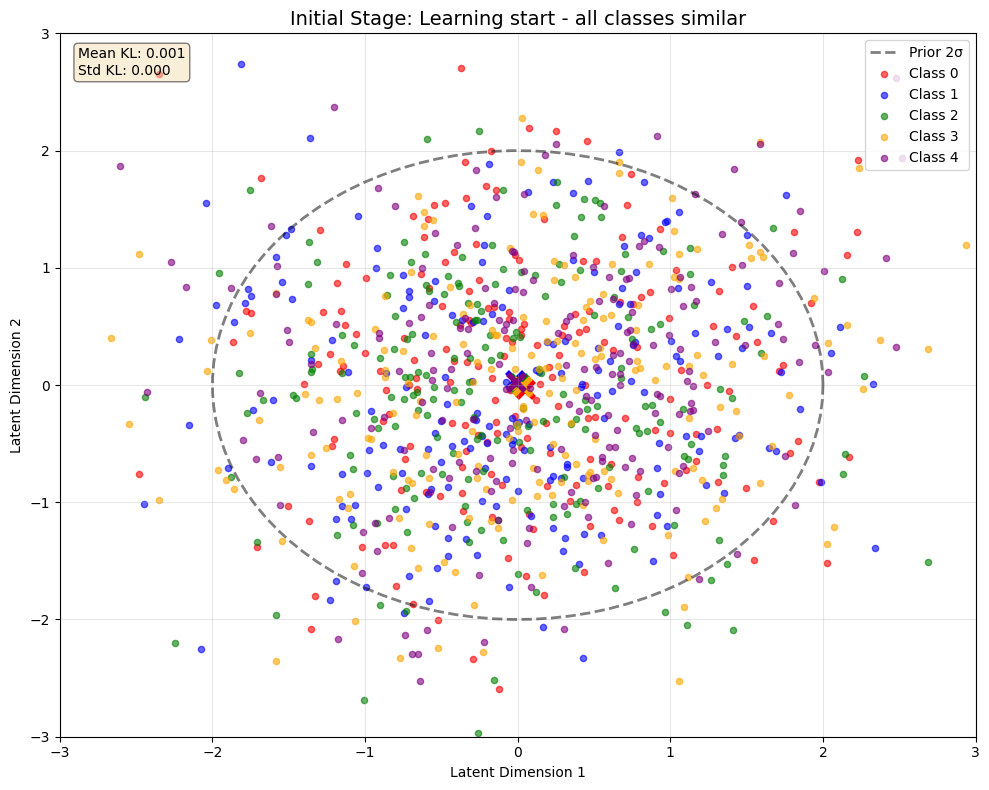

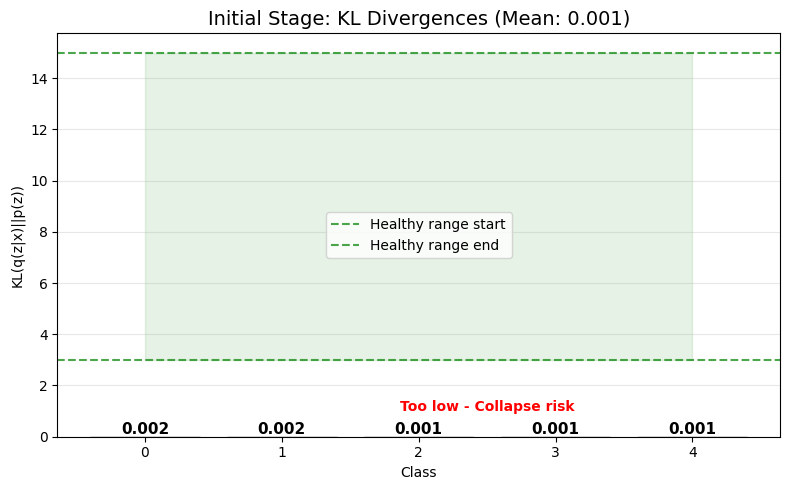

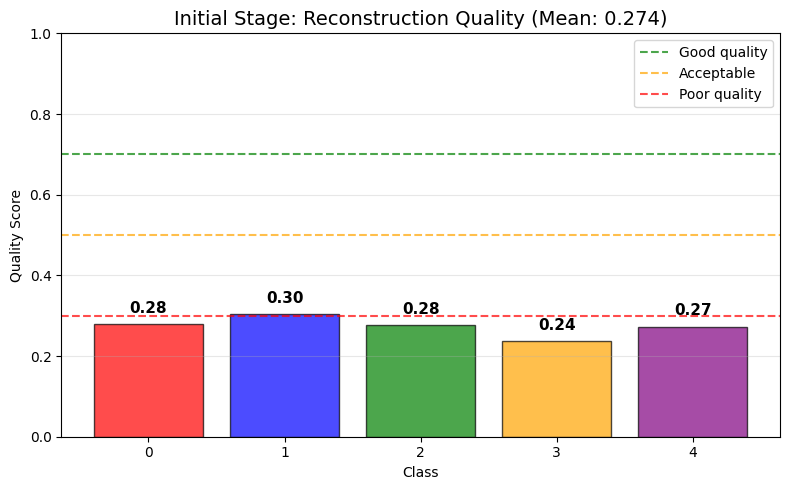

--------------------------------------------------

=== Middle Stage ===
Learning progress - classes separating
KL divergences: ['0.780', '1.184', '1.358', '0.974', '1.350']
Mean KL: 1.129


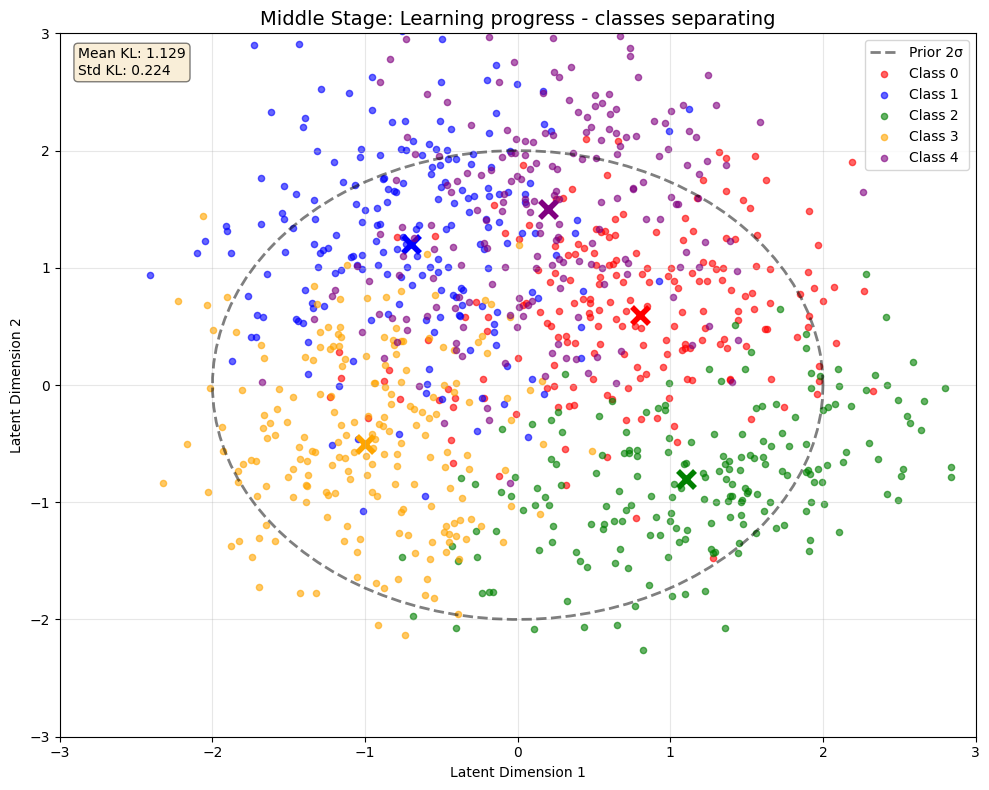

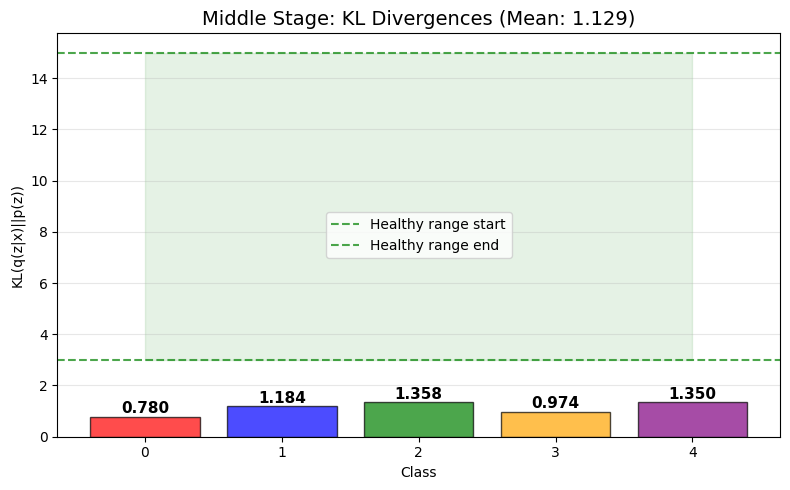

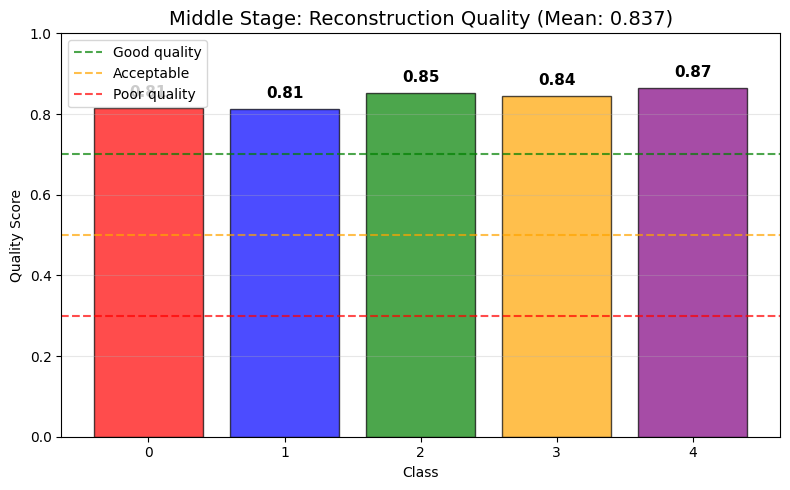

--------------------------------------------------

=== Final Stage ===
Learning complete - well separated clusters
KL divergences: ['2.374', '3.268', '3.213', '2.102', '2.998']
Mean KL: 2.791


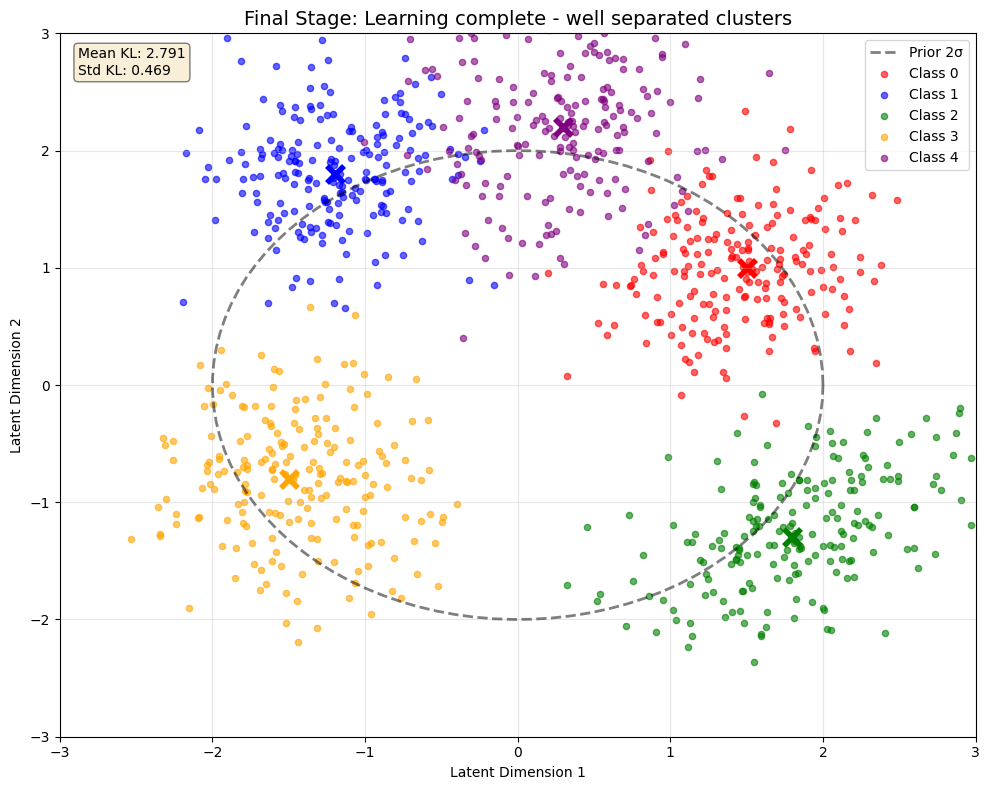

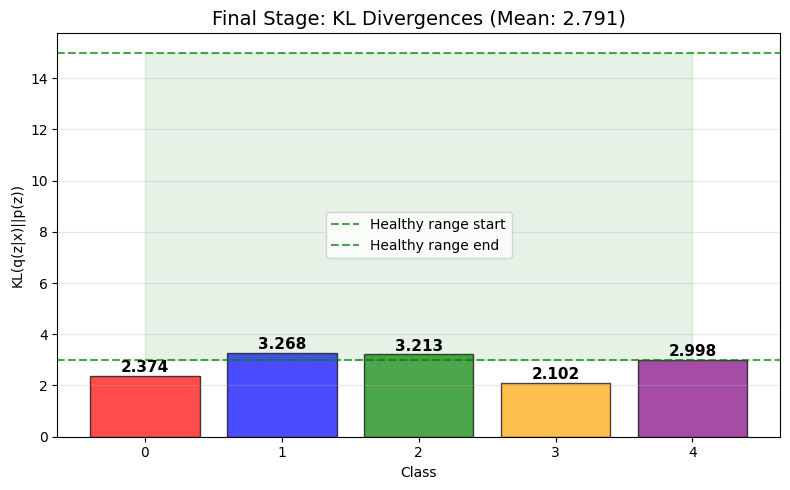

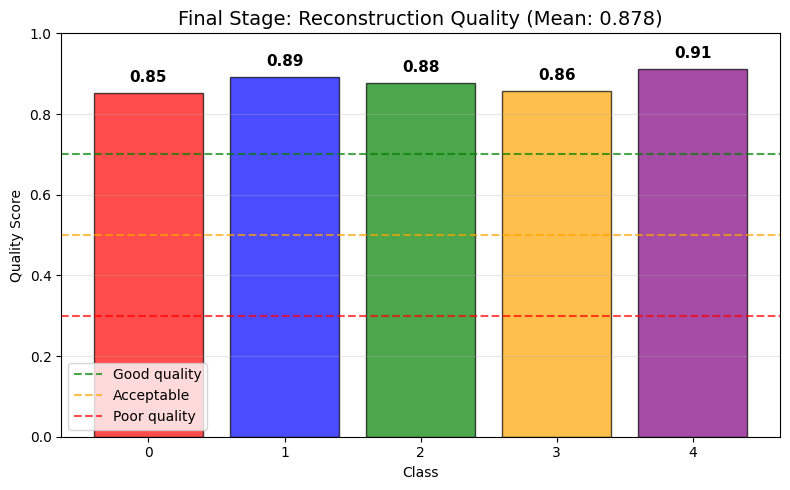

--------------------------------------------------


In [11]:
def simulate_vae_working():
    """VAE 분포 시뮬레이션 - 확실히 작동하는 버전"""
    
    # 학습 단계별 파라미터
    learning_stages = {
        'Initial': {
            'description': 'Learning start - all classes similar',
            'class_params': [
                {'mu': [0.05, -0.03], 'cov': [[0.98, 0.02], [0.02, 1.01]]},
                {'mu': [-0.02, 0.04], 'cov': [[1.03, -0.01], [-0.01, 0.97]]},
                {'mu': [0.01, 0.02], 'cov': [[0.99, 0.03], [0.03, 1.02]]},
                {'mu': [0.03, -0.01], 'cov': [[1.01, 0.01], [0.01, 0.98]]},
                {'mu': [-0.01, 0.03], 'cov': [[0.97, -0.02], [-0.02, 1.03]]}
            ]
        },
        'Middle': {
            'description': 'Learning progress - classes separating',
            'class_params': [
                {'mu': [0.8, 0.6], 'cov': [[0.5, 0.1], [0.1, 0.4]]},
                {'mu': [-0.7, 1.2], 'cov': [[0.4, 0.05], [0.05, 0.6]]},
                {'mu': [1.1, -0.8], 'cov': [[0.6, 0.2], [0.2, 0.3]]},
                {'mu': [-1.0, -0.5], 'cov': [[0.3, 0.0], [0.0, 0.5]]},
                {'mu': [0.2, 1.5], 'cov': [[0.4, 0.1], [0.1, 0.7]]}
            ]
        },
        'Final': {
            'description': 'Learning complete - well separated clusters',
            'class_params': [
                {'mu': [1.5, 1.0], 'cov': [[0.2, 0.05], [0.05, 0.25]]},
                {'mu': [-1.2, 1.8], 'cov': [[0.15, 0.0], [0.0, 0.2]]},
                {'mu': [1.8, -1.3], 'cov': [[0.3, 0.1], [0.1, 0.2]]},
                {'mu': [-1.5, -0.8], 'cov': [[0.2, 0.0], [0.0, 0.3]]},
                {'mu': [0.3, 2.2], 'cov': [[0.25, 0.05], [0.05, 0.35]]}
            ]
        }
    }
    
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    
    # 각 stage별로 순차적으로 그리기
    for stage_name, stage_data in learning_stages.items():
        
        print(f"\n=== {stage_name} Stage ===")
        print(f"{stage_data['description']}")
        
        # KL divergences 계산
        kl_values = []
        for params in stage_data['class_params']:
            mu = np.array(params['mu'])
            cov = np.array(params['cov'])
            kl = 0.5 * (np.trace(cov) + np.dot(mu, mu) - 2 - np.log(np.linalg.det(cov)))
            kl_values.append(kl)
        
        print(f"KL divergences: {[f'{kl:.3f}' for kl in kl_values]}")
        print(f"Mean KL: {np.mean(kl_values):.3f}")
        
        # 1. 사후분포 시각화
        plt.figure(figsize=(10, 8))
        
        # 사전분포 원 그리기
        theta = np.linspace(0, 2*np.pi, 100)
        circle_x = 2 * np.cos(theta)
        circle_y = 2 * np.sin(theta)
        plt.plot(circle_x, circle_y, 'k--', alpha=0.5, linewidth=2, label='Prior 2σ')
        
        # 각 클래스 그리기
        for class_idx, params in enumerate(stage_data['class_params']):
            mu = np.array(params['mu'])
            cov = np.array(params['cov'])
            
            # 샘플 생성
            samples = np.random.multivariate_normal(mu, cov, 200)
            plt.scatter(samples[:, 0], samples[:, 1], 
                       c=colors[class_idx], alpha=0.6, s=20,
                       label=f'Class {class_idx}')
            
            # 평균점 표시
            plt.scatter(mu[0], mu[1], c=colors[class_idx], 
                       s=150, marker='x', linewidth=4)
        
        plt.title(f'{stage_name} Stage: {stage_data["description"]}', fontsize=14)
        plt.xlabel('Latent Dimension 1')
        plt.ylabel('Latent Dimension 2')
        plt.legend(loc='upper right', fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.xlim(-3, 3)
        plt.ylim(-3, 3)
        
        # 통계 텍스트 추가
        textstr = f'Mean KL: {np.mean(kl_values):.3f}\nStd KL: {np.std(kl_values):.3f}'
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
        
        plt.tight_layout()
        plt.show()
        
        # 2. KL divergence 막대그래프
        plt.figure(figsize=(8, 5))
        bars = plt.bar(range(5), kl_values, color=colors, alpha=0.7, edgecolor='black')
        
        # 값 표시
        for i, (bar, kl) in enumerate(zip(bars, kl_values)):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(kl_values)*0.01,
                    f'{kl:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
        
        plt.title(f'{stage_name} Stage: KL Divergences (Mean: {np.mean(kl_values):.3f})', fontsize=14)
        plt.xlabel('Class')
        plt.ylabel('KL(q(z|x)||p(z))')
        plt.xticks(range(5))
        plt.grid(True, alpha=0.3, axis='y')
        
        # 건강한 KL 범위 표시
        plt.axhline(y=3, color='green', linestyle='--', alpha=0.7, label='Healthy range start')
        plt.axhline(y=15, color='green', linestyle='--', alpha=0.7, label='Healthy range end')
        plt.fill_between(range(5), 3, 15, alpha=0.1, color='green')
        
        if stage_name == 'Initial':
            plt.text(2.5, 1, 'Too low - Collapse risk', ha='center', color='red', fontweight='bold')
        
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        # 3. 재구성 품질 시뮬레이션
        reconstruction_quality = []
        for kl in kl_values:
            if kl < 0.5:  # Posterior collapse
                quality = 0.3 + 0.4 * (kl / 0.5)
            elif kl > 10:  # 과적합
                quality = 0.9 - 0.3 * ((kl - 10) / 10)
            else:  # 적절한 범위
                quality = 0.7 + 0.2 * np.exp(-((kl - 3) / 3)**2)
            
            quality += np.random.normal(0, 0.03)  # 노이즈
            quality = np.clip(quality, 0, 1)
            reconstruction_quality.append(quality)
        
        plt.figure(figsize=(8, 5))
        bars = plt.bar(range(5), reconstruction_quality, color=colors, alpha=0.7, edgecolor='black')
        
        # 값 표시
        for i, (bar, quality) in enumerate(zip(bars, reconstruction_quality)):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                    f'{quality:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
        
        plt.title(f'{stage_name} Stage: Reconstruction Quality (Mean: {np.mean(reconstruction_quality):.3f})', fontsize=14)
        plt.xlabel('Class')
        plt.ylabel('Quality Score')
        plt.xticks(range(5))
        plt.ylim(0, 1)
        plt.grid(True, alpha=0.3, axis='y')
        
        # 품질 기준선
        plt.axhline(y=0.7, color='green', linestyle='--', alpha=0.7, label='Good quality')
        plt.axhline(y=0.5, color='orange', linestyle='--', alpha=0.7, label='Acceptable')
        plt.axhline(y=0.3, color='red', linestyle='--', alpha=0.7, label='Poor quality')
        
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        print("-" * 50)

# 실행
simulate_vae_working()

3.2 ELBO 계산 시뮬레이션

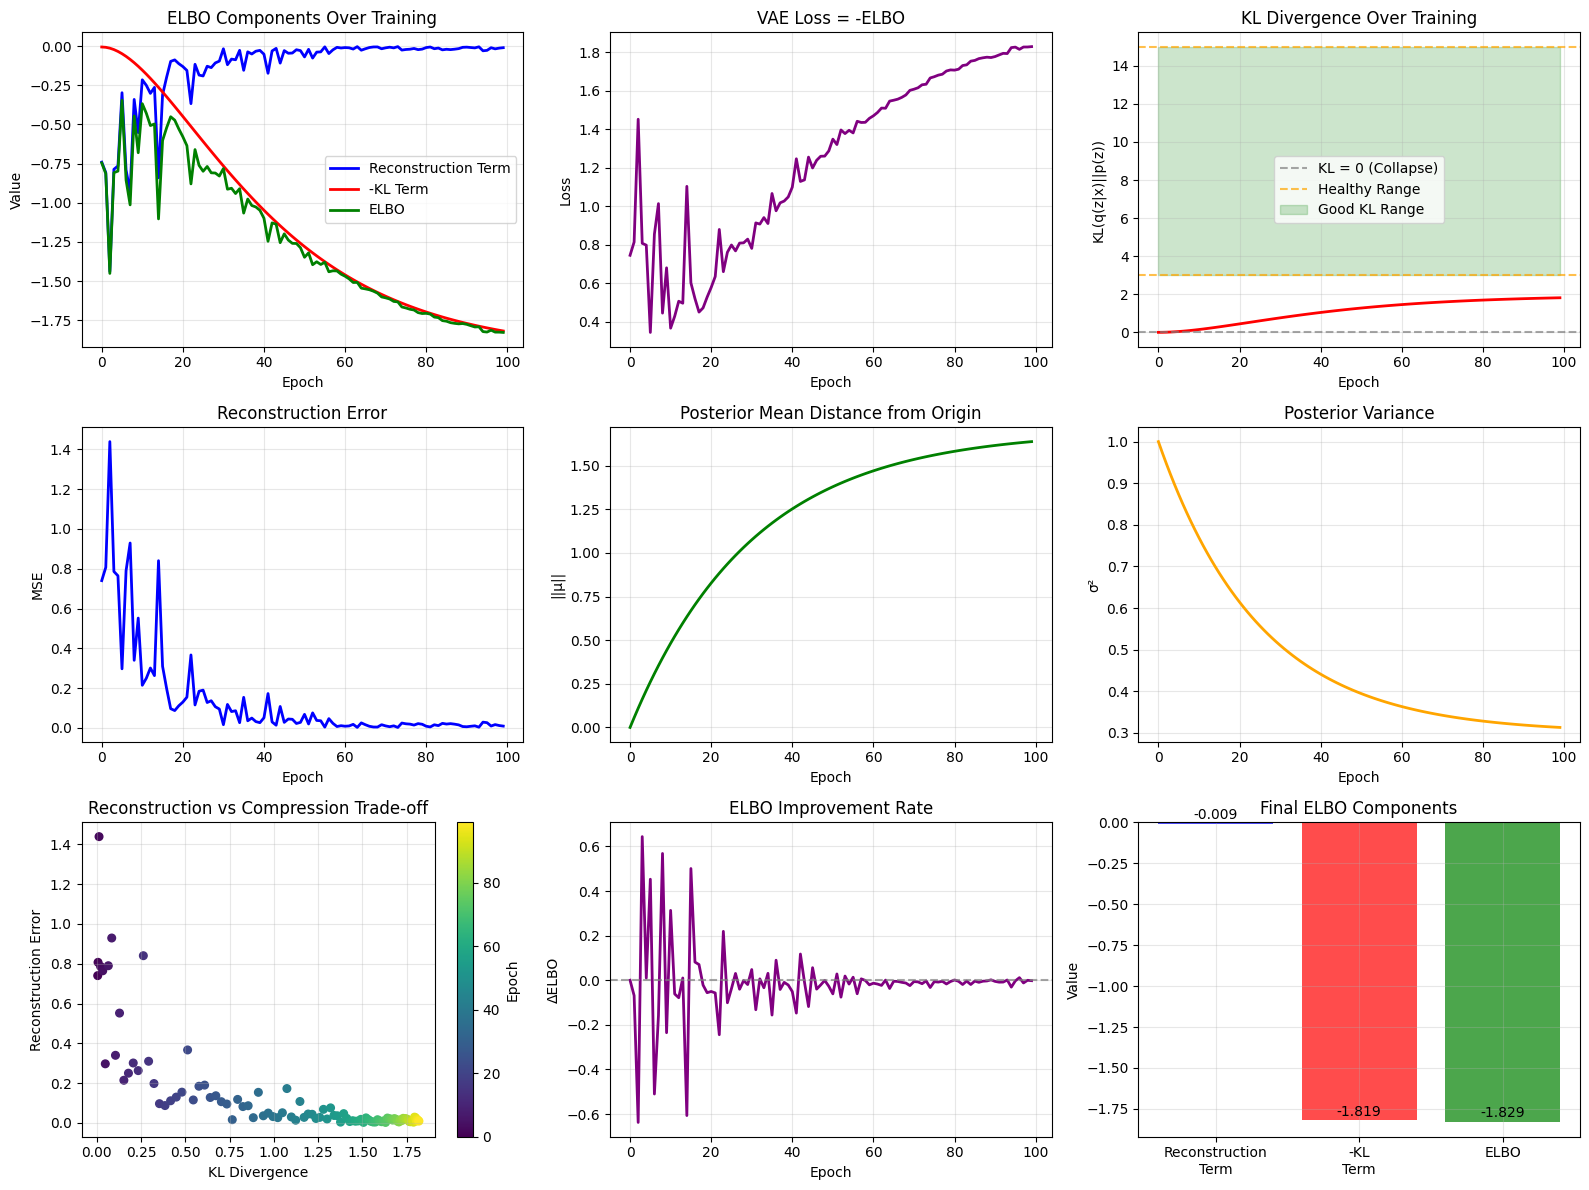

=== ELBO Training Simulation Results ===
Initial ELBO: -0.7455
Final ELBO: -1.8286
ELBO Improvement: -1.0831

Initial VAE Loss: 0.7455
Final VAE Loss: 1.8286
Loss Reduction: -1.0831

Final KL Divergence: 1.8192
Final Reconstruction Error: 0.0094


In [12]:
def simulate_elbo_calculation():
    """ELBO 계산 과정을 단계별로 시뮬레이션"""
    
    def elbo_components(x_true, x_recon, mu_posterior, cov_posterior, 
                       mu_prior=None, cov_prior=None):
        """ELBO의 구성요소들을 계산"""
        
        if mu_prior is None:
            mu_prior = np.zeros_like(mu_posterior)
        if cov_prior is None:
            cov_prior = np.eye(len(mu_posterior))
        
        # 1. 재구성 항 (Reconstruction term)
        # 간단히 MSE로 근사 (실제로는 -log p(x|z))
        reconstruction_error = np.mean((x_true - x_recon)**2)
        reconstruction_term = -reconstruction_error  # 음수 (클수록 좋음)
        
        # 2. KL 발산 항
        kl_term = 0.5 * (
            np.trace(np.linalg.solve(cov_prior, cov_posterior)) +
            np.dot(mu_posterior - mu_prior, 
                   np.linalg.solve(cov_prior, mu_posterior - mu_prior)) -
            len(mu_posterior) - 
            np.log(np.linalg.det(cov_posterior) / np.linalg.det(cov_prior))
        )
        
        # 3. ELBO
        elbo = reconstruction_term - kl_term
        
        return reconstruction_term, kl_term, elbo
    
    # 시뮬레이션 설정
    np.random.seed(42)
    n_epochs = 100
    
    # 가상의 데이터와 모델 파라미터
    x_true = np.array([0.8, 0.3, 0.9, 0.2, 0.7])  # 원본 데이터
    
    # 학습 과정 시뮬레이션
    epochs = []
    reconstruction_terms = []
    kl_terms = []
    elbo_values = []
    vae_losses = []
    
    for epoch in range(n_epochs):
        # 학습이 진행되면서 변화하는 파라미터들
        
        # 재구성 품질 개선 (지수적 개선)
        reconstruction_noise = 1.0 * np.exp(-epoch / 20) + 0.1
        x_recon = x_true + np.random.normal(0, reconstruction_noise, x_true.shape)
        
        # 사후분포 파라미터 변화
        # 초기에는 사전분포와 유사, 점차 특화됨
        separation_factor = 1 - np.exp(-epoch / 30)
        
        mu_posterior = np.array([
            1.5 * separation_factor,
            -0.8 * separation_factor
        ])
        
        # 분산은 점차 줄어듦 (더 확신있는 표현)
        variance_factor = 0.3 + 0.7 * np.exp(-epoch / 25)
        cov_posterior = np.array([
            [variance_factor, 0.1 * variance_factor],
            [0.1 * variance_factor, variance_factor]
        ])
        
        # ELBO 구성요소 계산
        recon_term, kl_term, elbo = elbo_components(
            x_true, x_recon, mu_posterior, cov_posterior
        )
        
        epochs.append(epoch)
        reconstruction_terms.append(recon_term)
        kl_terms.append(kl_term)
        elbo_values.append(elbo)
        vae_losses.append(-elbo)  # VAE Loss = -ELBO
    
    # 시각화
    plt.figure(figsize=(16, 12))
    
    # 1. ELBO 구성요소 변화
    plt.subplot(3, 3, 1)
    plt.plot(epochs, reconstruction_terms, 'b-', linewidth=2, label='Reconstruction Term')
    plt.plot(epochs, [-kl for kl in kl_terms], 'r-', linewidth=2, label='-KL Term')
    plt.plot(epochs, elbo_values, 'g-', linewidth=2, label='ELBO')
    plt.title('ELBO Components Over Training')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. VAE Loss 변화
    plt.subplot(3, 3, 2)
    plt.plot(epochs, vae_losses, 'purple', linewidth=2)
    plt.title('VAE Loss = -ELBO')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True, alpha=0.3)
    
    # 3. KL Divergence 변화
    plt.subplot(3, 3, 3)
    plt.plot(epochs, kl_terms, 'red', linewidth=2)
    plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7, label='KL = 0 (Collapse)')
    plt.axhline(y=3, color='orange', linestyle='--', alpha=0.7, label='Healthy Range')
    plt.axhline(y=15, color='orange', linestyle='--', alpha=0.7)
    plt.fill_between(epochs, 3, 15, alpha=0.2, color='green', label='Good KL Range')
    plt.title('KL Divergence Over Training')
    plt.xlabel('Epoch')
    plt.ylabel('KL(q(z|x)||p(z))')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 4. 재구성 오차 변화
    plt.subplot(3, 3, 4)
    reconstruction_errors = [-rt for rt in reconstruction_terms]
    plt.plot(epochs, reconstruction_errors, 'blue', linewidth=2)
    plt.title('Reconstruction Error')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.grid(True, alpha=0.3)
    
    # 5. 사후분포 평균 변화
    plt.subplot(3, 3, 5)
    mu_norms = []
    for epoch in epochs:
        separation_factor = 1 - np.exp(-epoch / 30)
        mu = np.array([1.5 * separation_factor, -0.8 * separation_factor])
        mu_norms.append(np.linalg.norm(mu))
    
    plt.plot(epochs, mu_norms, 'green', linewidth=2)
    plt.title('Posterior Mean Distance from Origin')
    plt.xlabel('Epoch')
    plt.ylabel('||μ||')
    plt.grid(True, alpha=0.3)
    
    # 6. 사후분포 분산 변화
    plt.subplot(3, 3, 6)
    variances = []
    for epoch in epochs:
        variance_factor = 0.3 + 0.7 * np.exp(-epoch / 25)
        variances.append(variance_factor)
    
    plt.plot(epochs, variances, 'orange', linewidth=2)
    plt.title('Posterior Variance')
    plt.xlabel('Epoch')
    plt.ylabel('σ²')
    plt.grid(True, alpha=0.3)
    
    # 7. 트레이드오프 시각화
    plt.subplot(3, 3, 7)
    plt.scatter(kl_terms, reconstruction_errors, c=epochs, cmap='viridis', s=30)
    plt.colorbar(label='Epoch')
    plt.xlabel('KL Divergence')
    plt.ylabel('Reconstruction Error')
    plt.title('Reconstruction vs Compression Trade-off')
    plt.grid(True, alpha=0.3)
    
    # 8. ELBO vs Epoch (3D 관점)
    plt.subplot(3, 3, 8)
    # ELBO improvement rate
    elbo_diff = np.diff(elbo_values)
    elbo_diff = np.concatenate([[0], elbo_diff])
    
    plt.plot(epochs, elbo_diff, 'purple', linewidth=2)
    plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
    plt.title('ELBO Improvement Rate')
    plt.xlabel('Epoch')
    plt.ylabel('ΔELBO')
    plt.grid(True, alpha=0.3)
    
    # 9. 최종 상태 요약
    plt.subplot(3, 3, 9)
    final_values = [
        reconstruction_terms[-1],
        -kl_terms[-1],
        elbo_values[-1]
    ]
    labels = ['Reconstruction\nTerm', '-KL\nTerm', 'ELBO']
    colors = ['blue', 'red', 'green']
    
    bars = plt.bar(labels, final_values, color=colors, alpha=0.7)
    plt.title('Final ELBO Components')
    plt.ylabel('Value')
    plt.grid(True, alpha=0.3)
    
    # 값 표시
    for bar, value in zip(bars, final_values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # 학습 결과 요약
    print("=== ELBO Training Simulation Results ===")
    print(f"Initial ELBO: {elbo_values[0]:.4f}")
    print(f"Final ELBO: {elbo_values[-1]:.4f}")
    print(f"ELBO Improvement: {elbo_values[-1] - elbo_values[0]:.4f}")
    print(f"\nInitial VAE Loss: {vae_losses[0]:.4f}")
    print(f"Final VAE Loss: {vae_losses[-1]:.4f}")
    print(f"Loss Reduction: {vae_losses[0] - vae_losses[-1]:.4f}")
    print(f"\nFinal KL Divergence: {kl_terms[-1]:.4f}")
    print(f"Final Reconstruction Error: {reconstruction_errors[-1]:.4f}")

# 실행
simulate_elbo_calculation()